<font size = "+3"><strong>Diabetes Classification</strong></font>

<font size = "+1"><strong> Finding out the factors that contributes to diabetes

<font face = "calibri">Diabetes is a chronic metabolic disorder that affects millions of people worldwide. It is characterized by high levels of glucose (sugar) in the blood, which can lead to serious complications such as cardiovascular disease, kidney failure, and blindness. Accurate classification of diabetes is crucial for effective treatment and management of the disease. Machine learning (ML) algorithms have shown promise in accurately classifying diabetes patients based on their clinical and demographic features. <br/>
In this project, I aim to develop a diabetes classification model using ML techniques, which can accurately predict the factors that contribute to having diabetes and help clinicians make informed treatment decisions. The goal is to build a interpretable model that can assist in early diagnosis and improve patient outcomes.

# Prepare Data

## Import

**Task:** Import all necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings(action = "ignore")

**Task 2:** Read dataframe

In [2]:
df = pd.read_csv("diabetes.csv")

**Task:** Inspect Dataframe

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<font face = "calibri">
<strong>Comment:</strong> The shape of the dataframe indicates that it contains 768 rows and 9 columns i.e. the total number of observations in the dataframe is 768, and the number of variables is 9.<br>
Also, the summary of the data types for each column, indicates that 2 columns are of type float64 and 7 columns are of type int64.

**Task:** Create a function to show the distribution

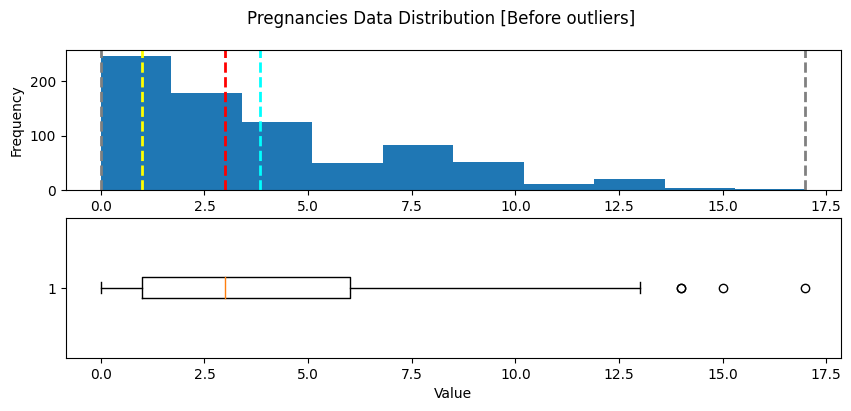

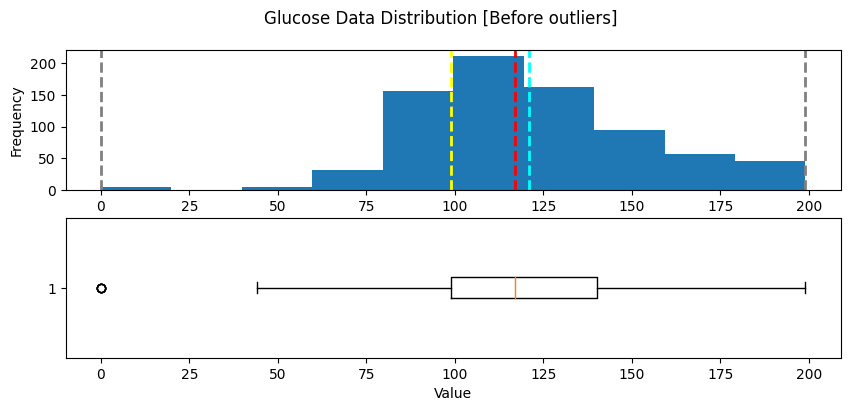

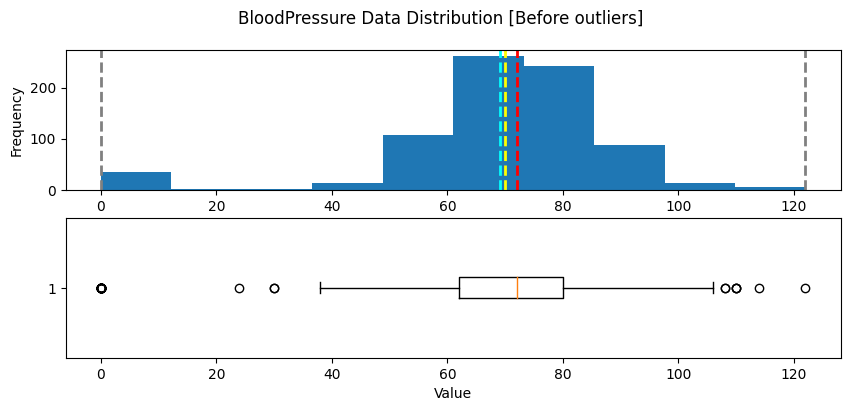

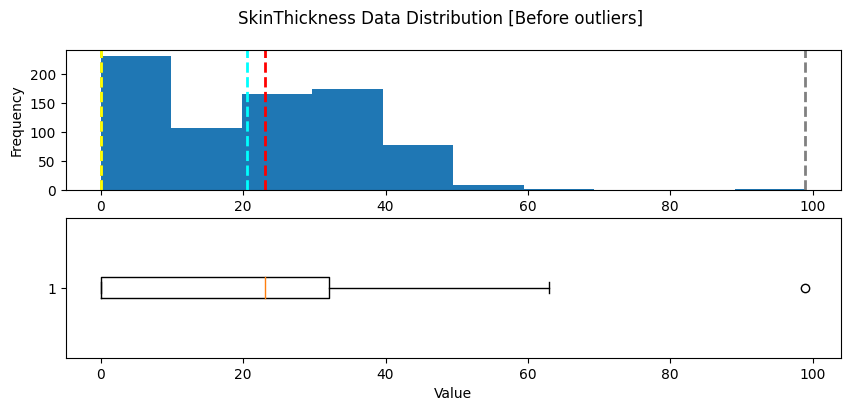

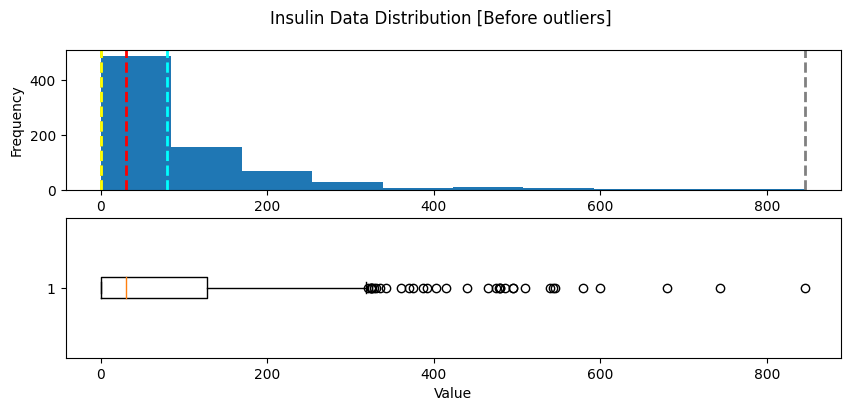

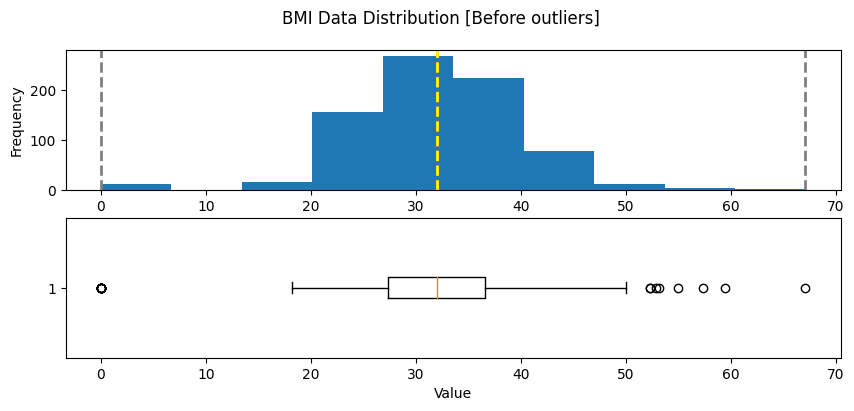

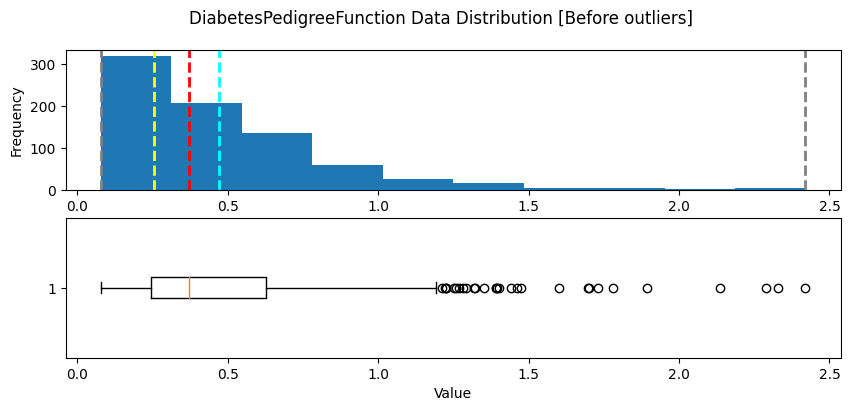

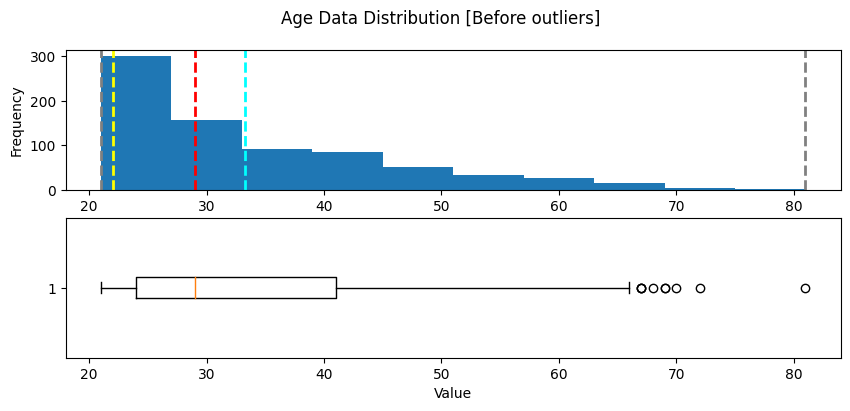

In [5]:
def show_distribution(var_data):
    
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'{var_data.name} Data Distribution [Before outliers]')

    # Show the figure
    fig.show()

cols = [k for k in df.columns if k != "Outcome"]

# Call the function
for col in cols:
    show_distribution(df[col])

**Task:** Remove Outliers and Subset Dataframe

In [6]:
df = df[df["Pregnancies"] < 13]
df = df[df["Age"] < 60]
df = df[df["BMI"] > 0]

**Task:** Create a function to show the distribution (after removing outliers)

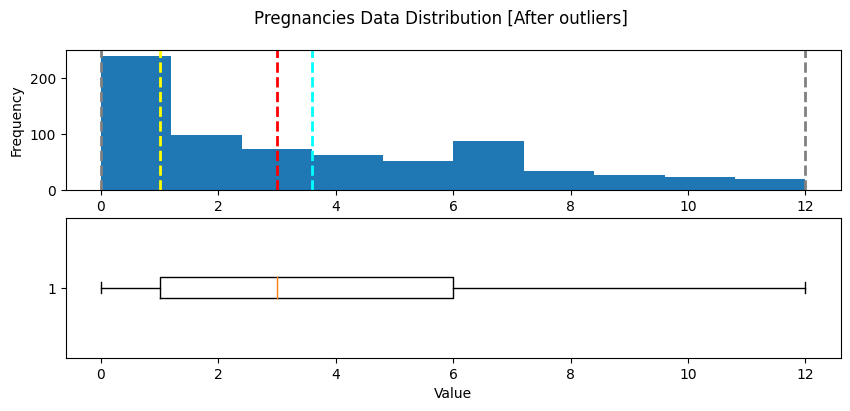

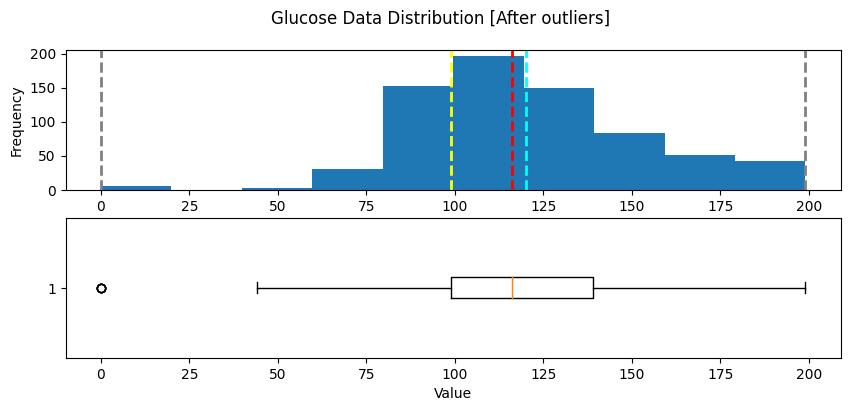

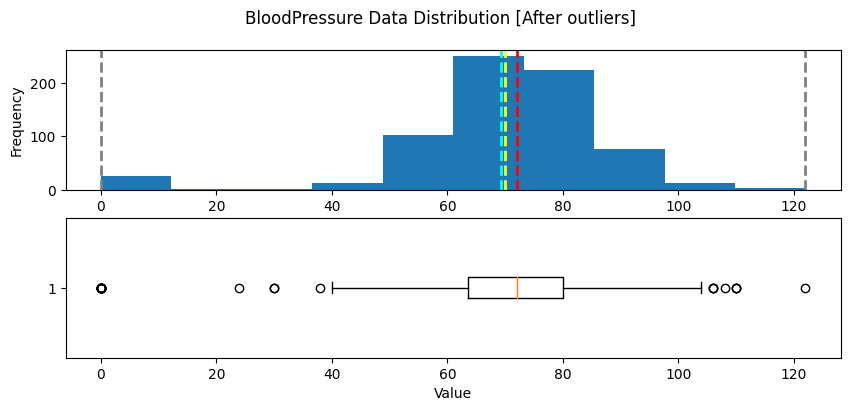

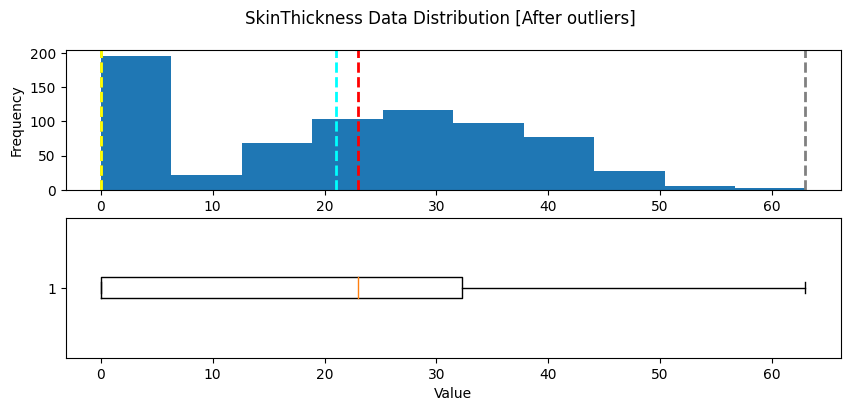

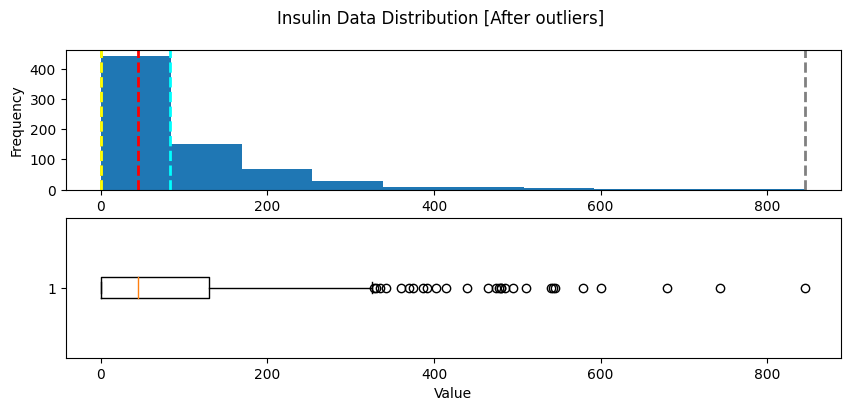

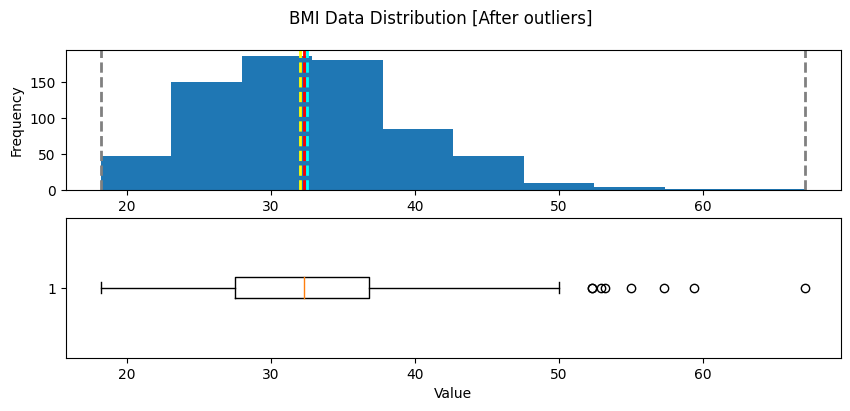

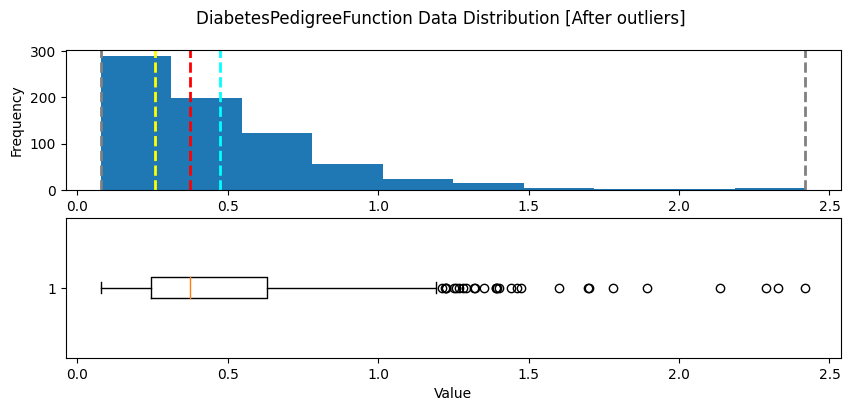

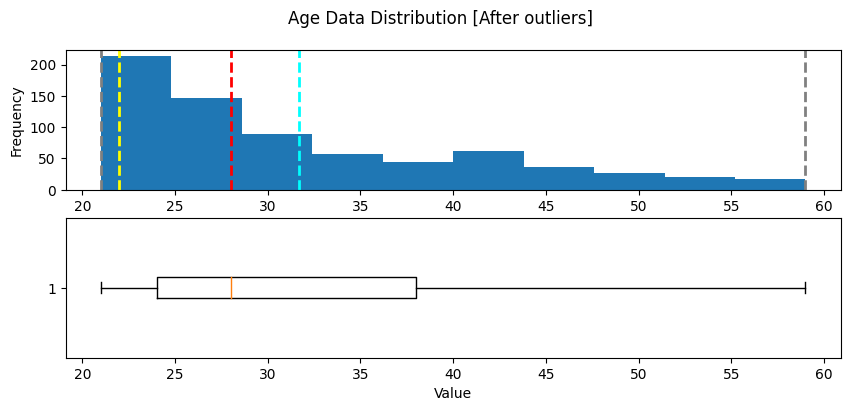

In [7]:
def show_distribution(var_data):
    
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'{var_data.name} Data Distribution [After outliers]')

    # Show the figure
    fig.show()

cols = [k for k in df.columns if k != "Outcome"]

# Call the function
for col in cols:
    show_distribution(df[col])

**Task:** Inspect unique values in each feature

In [8]:
for col in cols:
    print(col, df[col].nunique())

Pregnancies 13
Glucose 135
BloodPressure 45
SkinThickness 50
Insulin 182
BMI 245
DiabetesPedigreeFunction 493
Age 39


**Task:** Inspect Dataframe

In [9]:
df.shape

(712, 9)

<font face = "calibri">
<strong>Comment:</strong> After performing outlier detection and removal on the original dataset, the resulting dataframe now has a shape of (712, 9), indicating that 712 instances or rows of data with 9 features or columns remain in the cleaned dataset

## Explore

**Task:** Show correlation between features

In [10]:
corr = df.select_dtypes("number").drop(columns = ["Outcome"]).corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.112606,0.149252,-0.099837,-0.073893,-0.000604,-0.014640,0.615060
Glucose,0.112606,1.000000,0.127299,0.045594,0.353459,0.233967,0.143443,0.244863
BloodPressure,0.149252,0.127299,1.000000,0.207437,0.082897,0.195515,0.032764,0.240070
SkinThickness,-0.099837,0.045594,0.207437,1.000000,0.441665,0.391198,0.185186,-0.084345
Insulin,-0.073893,0.353459,0.082897,0.441665,1.000000,0.194778,0.180349,0.005583
BMI,-0.000604,0.233967,0.195515,0.391198,0.194778,1.000000,0.161034,0.091209
DiabetesPedigreeFunction,-0.014640,0.143443,0.032764,0.185186,0.180349,0.161034,1.000000,0.061721
Age,0.615060,0.244863,0.240070,-0.084345,0.005583,0.091209,0.061721,1.000000


**Task:** Visualize correlation

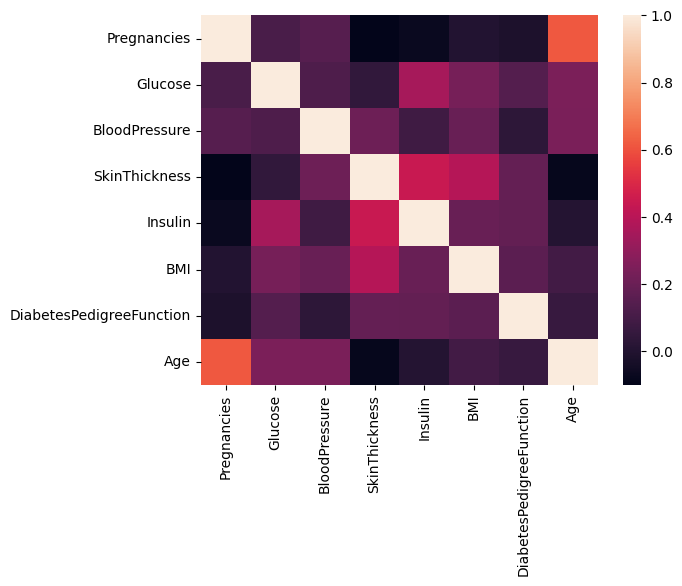

In [11]:
sns.heatmap(corr);

<font face = "calibri">
<strong>Comment:</strong> Based on the analysis of the heatmap, it can be concluded that there are no highly correlated features among the variables in the dataset. This suggests that the variables in the dataset are relatively independent of each other and do not exhibit multicollinearity, which can lead to unstable model estimates and inaccurate predictions. <br> Therefore, it is safe to assume that the variables in the dataset can be used as independent predictors in a statistical model without any concern for multicollinearity.

**Task:** Plot a Distribution of 'Outcome vs Age'

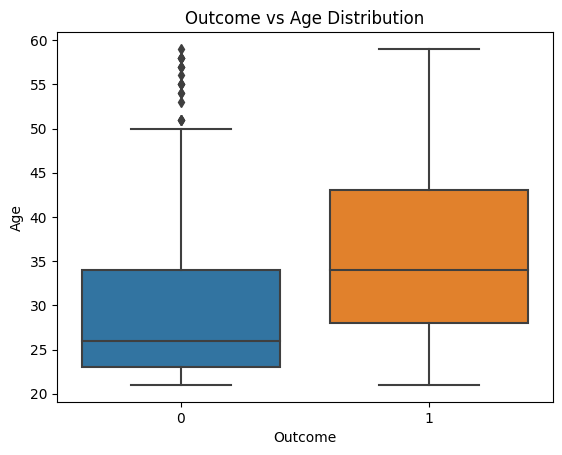

In [12]:
sns.boxplot(
    x = "Outcome", y = "Age", data = df
)
plt.title("Outcome vs Age Distribution");

<font face = "calibri">
<strong>Comment:</strong> Based on the results of the boxplot, it appears that there is a relationship between age and the likelihood of having diabetes. Specifically, it suggests that as people get older, their chances of having diabetes increase. 

**Task:** Plot a Distribution of 'Outcome vs Blood Pressure'

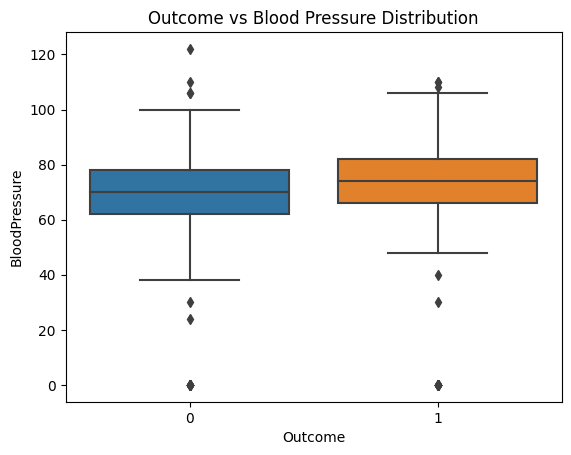

In [13]:
sns.boxplot(
    x = "Outcome", y = "BloodPressure", data = df
)
plt.title("Outcome vs Blood Pressure Distribution");

<font face = "calibri"> 
<strong>Comment: </strong> Based on the results from the boxplot analysis, it appears that there is no significant relationship between blood pressure and the incidence of diabetes. This means that there is no clear evidence to suggest that high or low blood pressure levels have a significant impact on the likelihood of developing diabetes

**Task:** Plot a Distribution of 'Outcome vs BMI'

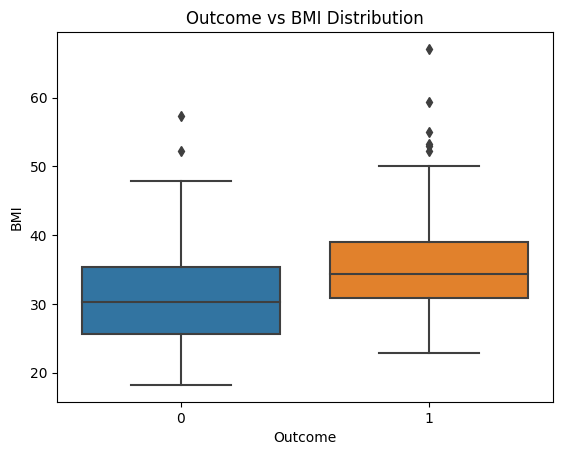

In [14]:
sns.boxplot(
    x = "Outcome", y = "BMI", data = df
)
plt.title("Outcome vs BMI Distribution");

<font face = "calibri">
<strong>Comment:</strong> Based on the boxplot analysis, it appears that there is a modest association between BMI (Body Mass Index) and diabetes. The boxplot shows that there is some variation in BMI values among individuals with and without diabetes, but the difference is not very significant. <br> This suggests that while BMI may play a role in the development of diabetes, it is not the sole determining factor

**Task:** Check the proportion of people with/without diabetes

In [15]:
major, minor = df["Outcome"].value_counts(normalize = True)
print("Proportion without diabetes: ", round(major, 2))
print("Proportion with diabetes: ", round(minor, 2))

Proportion without diabetes:  0.65
Proportion with diabetes:  0.35


**Task:** Visualize the proportion above

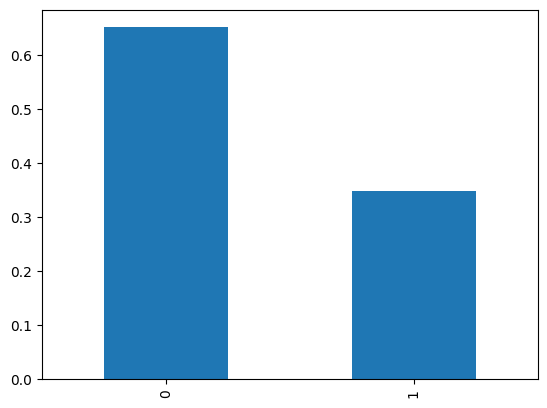

In [16]:
df["Outcome"].value_counts(normalize = True).plot(kind = "bar");

<font face = "calibri">
<strong>Comment:</strong> The above bar chart indicates the distribution of a population with respect to diabetes status. <br>In this case, the proportion without diabetes is 0.65, which means that 65% of the population does not have diabetes. On the other hand, the proportion with diabetes is 0.35, which means that 35% of the population has diabetes.
<br> This also shows a class- imbalance

## Split

**Task:** Create the feature matrix `X` and target vector `y`. The target in this case is `"Outcome"`

In [17]:
target = "Outcome"
X = df.drop(columns = target)
y = df[target]

**Task:** Create a train_test_split to split the training and test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 12
)

# Build Model

## Baseline

**Task:** Calculate the baseline accuracy score of this model

In [19]:
acc_score = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy score: ", round(acc_score, 2))

Baseline Accuracy score:  0.65


## Iterate and Evaluate

**Task:** Perform data resampling

In [20]:
model_oversampler = RandomOverSampler(random_state = 12)
X_train_over, y_train_over = model_oversampler.fit_resample(X_train, y_train)

model_undersampler = RandomUnderSampler(random_state = 12)
X_train_under, y_train_under = model_undersampler.fit_resample(X_train, y_train)

### Gradient Boosting Model

**Task:** Instantiate and train GradientBoostingClassifier models

In [21]:
model = GradientBoostingClassifier(random_state = 12)
model.fit(X_train, y_train)

model_over = GradientBoostingClassifier(random_state = 12)
model_over.fit(X_train_over, y_train_over)

model_under = GradientBoostingClassifier(random_state = 12)
model_under.fit(X_train_under, y_train_under)

GradientBoostingClassifier(random_state=12)

**Task:** Print out the training and testing accuracy scores for each model

In [22]:
for m in [model, model_over, model_under]:
    print(m.score(X_train, y_train))
    print(m.score(X_test, y_test), '\n')

0.9417670682730924
0.7383177570093458 

0.9397590361445783
0.7429906542056075 

0.8975903614457831
0.705607476635514 



<font face = "calibri">
<strong>Comment:</strong> The accuracy scores for the three models are as follows:
<ul>
<li>model: 94.18% training accuracy and 73.83% testing accuracy
<li>model_over: 93.98% training accuracy and 74.30% testing accuracy
<li>model_under: 89.76% training accuracy and 70.56% testing accuracy
</ul>
The accuracy scores of model and model_over are relatively close, with only a small difference in the accuracy scores. This suggests that both models perform similarly in terms of their ability to generalize to new data.
<br>
On the other hand, the model_under has a significantly lower testing accuracy compared to the other two models, indicating that it is not performing well. This could be due to a loss of information from undersampling the majority class, leading to a less representative training set. Therefore, the model_under may not be suitable for use in this scenario.
<br>
In summary, while the accuracy scores for model and model_over are close, indicating similar performance, the model_under performs poorly and cannot be used effectively.
<br>
For this ML model, we make use of the 'GradientBoostingClassifier model'

**Task:** Instantiate a GradientBoostingClassifier

In [23]:
clf = GradientBoostingClassifier(random_state = 12)

**Task:** Create a dictionary of hyperparameters

In [24]:
params = {
    "n_estimators" : range(25, 100, 25),
    "max_depth" : range(10, 50, 10)   
}

**Task:** Perform a GridSearch

In [25]:
model_grad = GridSearchCV(
    clf,
    param_grid = params,
    verbose = 1,
    n_jobs = -1,
    cv = 5   
)
model_grad.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

**Task:** Visualize the ConfusionMatrix of the model estimator

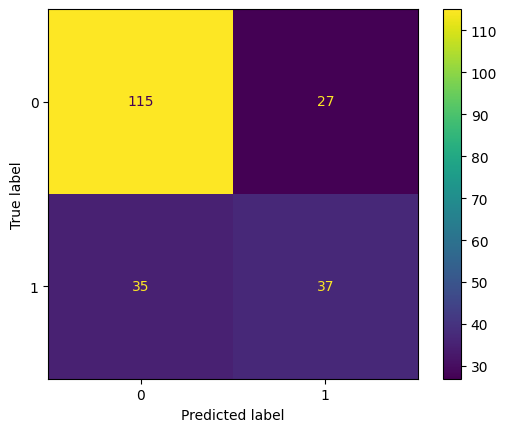

In [26]:
ConfusionMatrixDisplay.from_estimator(model_grad, X_test, y_test);

**Task:** Print the classification_report of the model

In [27]:
print(classification_report(y_test, model_grad.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       142
           1       0.58      0.51      0.54        72

    accuracy                           0.71       214
   macro avg       0.67      0.66      0.67       214
weighted avg       0.70      0.71      0.71       214



<font face = "calibri">
<strong>Comment:</strong> 
<ul>
    <li>Looking at the results, the model achieved an overall accuracy of 71%, which means that it correctly classified 71% of the samples. <li>The precision for class 0 is 0.77, which means that 77% of the samples predicted as class 0 are actually class 0. <li>The recall for class 0 is 0.81, which means that 81% of the actual class 0 samples were correctly identified as class 0 by the model
<li>For class 1, the precision is 0.58, which means that 58% of the samples predicted as class 1 are actually class 1. <li>The recall for class 1 is 0.51, which means that 51% of the actual class 1 samples were correctly identified as class 1 by the model.
<li>The F1-scores for classes 0 and 1 are 0.79 and 0.54, respectively. 
.</ul>
The weighted average of precision, recall, and F1-score is 0.70, which means that the overall performance of the model is fairly good, but there is still room for improvement, particularly for class 1. The macro average of precision, recall, and F1-score is 0.67, which provides a balanced view of the model's performance across the two classes.


### RandomForest Model

**Task:** Instantiate and train a RandomForestClassifier

In [28]:
model = RandomForestClassifier(random_state = 12)
model.fit(X_train, y_train)

model_over = RandomForestClassifier(random_state = 12)
model_over.fit(X_train_over, y_train_over)

model_under = RandomForestClassifier(random_state = 12)
model_under.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=12)

**Task:** Print out the training and testing accuracy scores for each model

In [29]:
for m in [model, model_over, model_under]:
    print(m.score(X_train, y_train))
    print(m.score(X_test, y_test), '\n')

1.0
0.7663551401869159 

1.0
0.7616822429906542 

0.9136546184738956
0.7289719626168224 



<font face = "calibri">
<strong>Comment:</strong> The accuracy scores for the three models are as follows:
<ul>
<li>model: 100% training accuracy and 76.63% testing accuracy
<li>model_over: 100% training accuracy and 76.17% testing accuracy
<li>model_under: 91.37% training accuracy and 72.90% testing accuracy
</ul>
The interpretation is close to the accuracy scores of the 'RandomForestClassifier' models
<br>
For this ML model, we make use of the 'RandomForestClassifier model' and ignore 'model_over' & 'model_under'

**Task:** Instantiate a RandomForestClassifier

In [30]:
clf = RandomForestClassifier(random_state = 12)

**Task:** Perform a GridSearch

In [31]:
model_rand = GridSearchCV(
    clf,
    param_grid = params,
    verbose = 1,
    n_jobs = -1,
    cv = 5   
)
model_rand.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

**Task:** Visualize the ConfusionMatrix of the model estimator

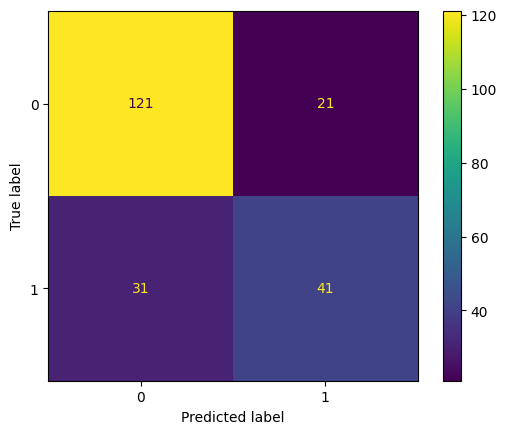

In [32]:
ConfusionMatrixDisplay.from_estimator(model_rand, X_test, y_test);

**Task:** Print the classification_report of the model

In [33]:
print(classification_report(y_test, model_rand.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       142
           1       0.66      0.57      0.61        72

    accuracy                           0.76       214
   macro avg       0.73      0.71      0.72       214
weighted avg       0.75      0.76      0.75       214



<font face = "calibri">
<strong>Comment:</strong> 
<ul>
<li>Looking at the results, the model achieved an overall accuracy of 76%, which means that it correctly classified 76% of the samples. 
<li>The precision for class 0 is 0.80, which means that 80% of the samples predicted as class 0 are actually class 0. 
<li>The recall for class 0 is 0.85, which means that 85% of the actual class 0 samples were correctly identified as class 0 by the model
<li>For class 1, the precision is 0.66, which means that 66% of the samples predicted as class 1 are actually class 1. 
<li>The recall for class 1 is 0.57, which means that 57% of the actual class 1 samples were correctly identified as class 1 by the model.
<li>The F1-scores for classes 0 and 1 are 0.82 and 0.61, respectively. 
</ul>
The weighted average of precision, recall, and F1-score is 0.75 while the macro average of precision, recall, and F1-score is 0.73<br><br>
In conclusion, this model has better metrics compared to the GradientBoostingClassifier model

### DecisionTree Model

**Task:** Instantiate a DecisionTreeClassifier

In [34]:
model_dtc = DecisionTreeClassifier(random_state = 12)

**Task:** Create a train_test_split to split the validation data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 12
)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 12
)

**Task:** Train the DecisionTreeClassifier model on the train data

In [36]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

**Task:** Calculate the validation accuracy score

In [37]:
round(model_dtc.score(X_val, y_val), 2)

0.71

**Task:** Calculate the max depth of the model

In [38]:
depth = model_dtc.get_depth()
depth

13

**Task:** Generate lists of train and validation accuracy scores in each depth

In [39]:
train_acc = []
val_acc = []
for d in range(2, depth, 2):
    model = DecisionTreeClassifier(random_state = 2, max_depth = d)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    val_acc.append(model.score(X_val, y_val))

**Task:** Create a line plot of training and validation accuracy scores

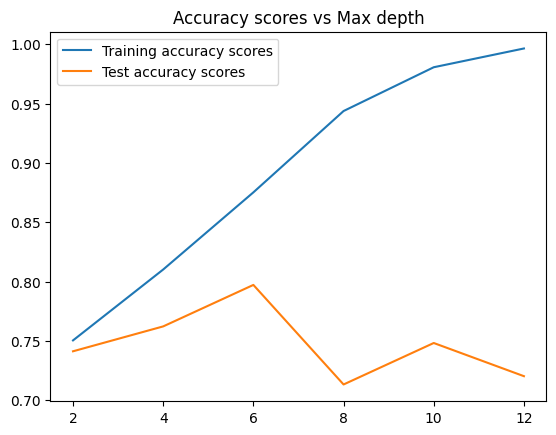

In [40]:
plt.plot(range(2, depth, 2), train_acc, label = "Training accuracy scores")
plt.plot(range(2, depth, 2), val_acc, label = "Test accuracy scores")
plt.title("Accuracy scores vs Max depth")
plt.legend();

<font face = "calibri">
<strong>Comment:</strong> 
Looking at the line plot, we can see that the lines of the max depth versus accuracy scores of the validation and test scores do not intersect, it suggests that the performance of the model is not improving with increasing values of the max depth hyperparameter. <br>
<strong>Suggestion:</strong> Try other hyperparameter techniques

**Task:** Create a train_test_split to split the training and test data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 12
)

**Task:** Tune hyperparameters using 'Minimum samples' required to split

In [42]:
# Define the range of values for the hyperparameter
param_grid = {'min_samples_split': range(2, 10)}

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier(random_state=12)

# Create an instance of GridSearchCV
model_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
model_dtc.fit(X_train, y_train)

# Get the best hyperparameter value
min_samples_split = model_dtc.best_params_['min_samples_split']

# Create a new instance of the decision tree classifier with the best hyperparameter value
model_dtc = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=12)

# Fit the decision tree classifier to the training data
model_dtc.fit(X_train, y_train)

# Evaluate the performance of the decision tree classifier on the test data
accuracy = model_dtc.score(X_test, y_test)

# Print Accuracy Score
print("Accuracy score: ", round(accuracy, 2))

Accuracy score:  0.73


**Task:** Visualize the ConfusionMatrix of the model estimator

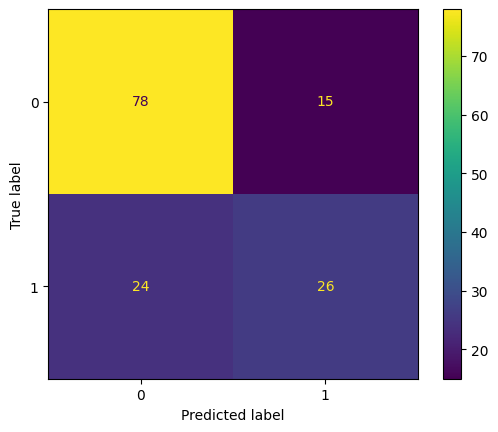

In [43]:
ConfusionMatrixDisplay.from_estimator(model_dtc, X_test, y_test);

**Task:** Print the classification_report of the model

In [44]:
print(classification_report(y_test, model_dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        93
           1       0.63      0.52      0.57        50

    accuracy                           0.73       143
   macro avg       0.70      0.68      0.69       143
weighted avg       0.72      0.73      0.72       143



<font face = "calibri">
<strong>Comment:</strong> 
<ul>
<li>Looking at the results, the model achieved an overall accuracy of 73%, which means that it correctly classified 73% of the samples. 
<li>The precision for class 0 is 0.76, which means that 76% of the samples predicted as class 0 are actually class 0. 
<li>The recall for class 0 is 0.84, which means that 84% of the actual class 0 samples were correctly identified as class 0 by the model
<li>For class 1, the precision is 0.63, which means that 63% of the samples predicted as class 1 are actually class 1. 
<li>The recall for class 1 is 0.52, which means that 52% of the actual class 1 samples were correctly identified as class 1 by the model.
<li>The F1-scores for classes 0 and 1 are 0.80 and 0.57, respectively. 
</ul>
<strong>Conclusion:</strong> This model has better metrics compared to the GradientBoostingClassifier model, however the RandomForestClassifier model performs best.

<font face = "calibri">
<strong>Going further:</strong> We make use of the RandomForestClassifier model from this step

**Task:** Create a dataframe of the cross-validation (CV) results

In [51]:
cv_result = pd.DataFrame(model_rand.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109380,0.023211,0.003125,6.249714e-03,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.80,0.83,0.74,0.707071,0.808081,0.777030,0.045963,9
1,0.227993,0.019559,0.009375,7.654539e-03,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.81,0.79,0.76,0.707071,0.818182,0.777051,0.040331,8
2,0.319019,0.033933,0.029030,1.648084e-02,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.80,0.77,0.77,0.717172,0.838384,0.779111,0.039880,7
3,0.105533,0.017787,0.010281,8.555743e-03,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.78,0.78,0.74,0.737374,0.808081,0.769091,0.026872,10
4,0.225512,0.009662,0.015625,6.572747e-07,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.80,0.78,0.76,0.737374,0.828283,0.781131,0.031438,4


**Task:** Print the best estimator

In [47]:
model_rand.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=75, random_state=12)

**Task:** Visualize the plot of Time vs Estimators with Maximum Depth of 20

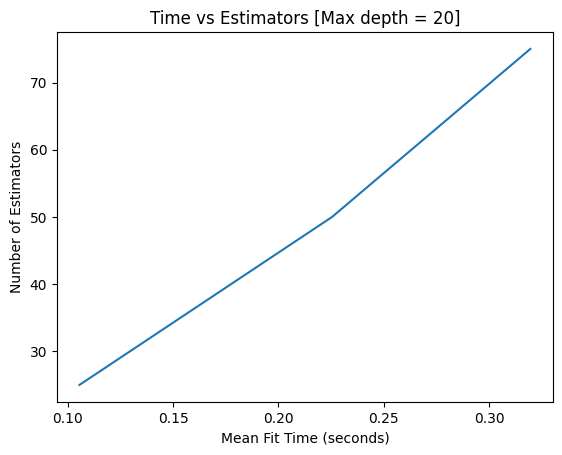

In [56]:
mask_estimator = cv_result[cv_result["param_max_depth"] == 20]
plt.plot(
    mask_estimator["mean_fit_time"],mask_estimator["param_n_estimators"]
)
plt.xlabel("Mean Fit Time (seconds)")
plt.ylabel("Number of Estimators")
plt.title("Time vs Estimators [Max depth = 20]");

<font face = "calibri">
<strong>Comment:</strong> The plot shows that the number of estimators increases approximately linearly as the mean fit time increases

**Task:** Visualize the plot of Time vs Depths with Estimators of 50

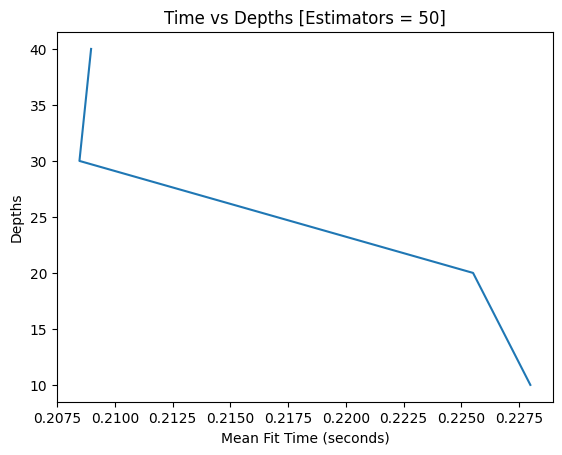

In [57]:
mask_estimator = cv_result[cv_result["param_n_estimators"] == 50]
plt.plot(
    mask_estimator["mean_fit_time"], mask_estimator["param_max_depth"]
)
plt.xlabel("Mean Fit Time (seconds)")
plt.ylabel("Depths")
plt.title("Time vs Depths [Estimators = 50]");

<font face = "calibri">
<strong>Comment:</strong> The plot shows that the overall pattern is that number of depths decreases approximately as the mean fit time increases

# Communicate Results

**Task:** Generate the feature importances

In [58]:
feat_imp = model_rand.best_estimator_.feature_importances_
feat_imp

array([0.09496703, 0.26213667, 0.08602096, 0.0700312 , 0.07284773,
       0.1685685 , 0.13152014, 0.11390777])

**Task:** Generate a Series of features and the importances

In [59]:
odds_ratio = pd.Series(feat_imp, index = X_train.columns).sort_values()
odds_ratio

SkinThickness               0.070031
Insulin                     0.072848
BloodPressure               0.086021
Pregnancies                 0.094967
Age                         0.113908
DiabetesPedigreeFunction    0.131520
BMI                         0.168569
Glucose                     0.262137
dtype: float64

**Task:** Visualize the most important features

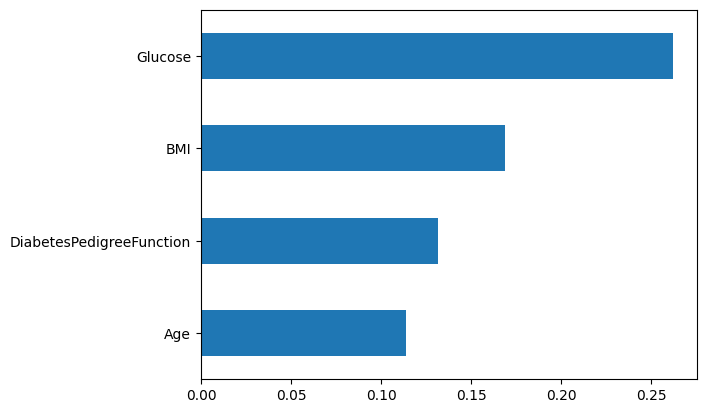

In [60]:
odds_ratio.tail(4).plot(kind = "barh");

<font face = "calibri">
<strong>Comment:</strong> The most important features that  contribute to having diabetes are Glucose, BMI, DiabetesPedigreeFunction and Age